# Lecture 8

## Iteration, Simulation, and Probability

# Announcements

* OKPY: let us know if you don't have any assignments graded yet
* Midterm: practice exams posted, 1 week away
* HW: due Sunday instead of Monday
* Project: released, due in two weeks


In [1]:
# imports!
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings; warnings.simplefilter('ignore') # just for the slides!
import numpy as np
from datascience import *

# Iteration

We can use Python to help automate our job at NASA:

In [2]:
#: counting down...
import time

print("Launching in...")
print("t-minus", 10)
time.sleep(1)
print("t-minus", 9)
time.sleep(1)
print("t-minus", 8)
time.sleep(1)
print("t-minus", 7)
time.sleep(1)
print("t-minus", 6)
time.sleep(1)
print("t-minus", 5)
time.sleep(1)
print("t-minus", 4)
time.sleep(1)
print("t-minus", 3)
time.sleep(1)
print("t-minus", 2)
time.sleep(1)
print("t-minus", 1)
time.sleep(1)
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


## Better approach: use a `for`-loop.

In [3]:
print("Launching in...")

for t in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    print("t-minus", t)
    time.sleep(1)
    
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


## `for`-loops

- Do something for every value in a sequence
- Syntax (don't forget the colon):

```
for <loop variable> in <sequence>:
    <body>
```

- Indentation matters!


In [10]:
#: loop variable can be anything
for base in np.arange(1, 5):
    print(base ** 2)

1
4
9
16


## Ranges

- We can use `np.arange` to create sequences to iterate over:

In [11]:
print("Launching in...")

for t in np.arange(10, 0, -1):
    print("t-minus", t)
    time.sleep(1)
    
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


In [ ]:
for x in np.arange(1, 5)#: loop variable can be anything
for x in [1, 2, 3, 4]:
    print(x ** 2):
    print(x ** 2)

## Iterating through an array of strings

In [13]:
flavors = make_array('Chocolate', 'Vanilla', 'Strawberry')
# unravel the loop: write the same code without using a loop
print("Chocolate" +" is delicious!")
print("Vanilla" +" is delicious!")
print("Strawberry" +" is delicious!")

Chocolate is delicious!
Vanilla is delicious!
Strawberry is delicious!


In [12]:
flavors = make_array('Chocolate', 'Vanilla', 'Strawberry')

for flavor in flavors:
    print(flavor +" is delicious!")

Chocolate is delicious!
Vanilla is delicious!
Strawberry is delicious!


## Iterating through an array by indexing

In [18]:
np.arange(flavors.size)

array([0, 1, 2, 3])

In [21]:
#: use np.arange(size)

flavors = make_array('Chocolate', 'Vanilla')

for index in np.arange(flavors.size):
    print(flavors.item(index)+" is delicious!")

Chocolate is delicious!
Vanilla is delicious!


## Building an array by iterating

- How many letters are in each name?
- We want to save our results!
- Create an empty array outside the loop.
- Use `np.append` inside the loop: appends an element to the end of array.

In [24]:
len("Strawberry")

10

In [26]:
example = make_array(4, 89)
np.append(example, 56)

array([ 4, 89, 56], dtype=int64)

In [ ]:
flavors = make_array('Chocolate', 'Vanilla', 'Strawberry')

flavor_lengths = make_array()
#unravel the loop
np.append(flavor_lengths, len("Chocolate"))
np.append(flavor_lengths, len("Vanilla"))
np.append(flavor_lengths, len("Strawberry"))
    
flavor_lengths

In [29]:
flavors = make_array('Chocolate', 'Vanilla', 'Strawberry')

flavor_lengths = make_array()
flavor_lengths

array([], dtype=float64)

In [30]:
np.append(flavor_lengths, len("Chocolate"))

array([9.])

In [31]:
flavor_lengths

array([], dtype=float64)

In [32]:
np.append(flavor_lengths, len("Vanilla"))

array([7.])

In [28]:
flavors = make_array('Chocolate', 'Vanilla', 'Strawberry')

flavor_lengths = make_array()

for flavor in flavors:
    np.append(flavor_lengths, len(flavor))
    
flavor_lengths

array([], dtype=float64)

## The "Monty Hall" Problem

<img src="./monty.svg" width=75% />

## Discussion question

- You originally selected door #1.
- The host reveals door #3 to have a goat behind it.
- You should:

    - A) keep with door number #1; it has just as high a chance of winning as door #2.
    - B) switch to door number #2; it has a higher chance of winning than door #1.

## Marilyn vos Savant's column


<div style="display: flex; margin-top: .5in">
<div style="width: 45%;">
    <ul>
        <li>vos Savant asked the question in <i>Parade</i> magazine.</li>
        <li>She stated the correct answer: <i>switch</i>.</li>
        <li>Received over 10,000 letters in disagreement.</li>
        <li>Over 1,000 letters from people with Ph.D.s</li>
    </ul>
</div>
<div style="width: 50%;">
    <img src="vos_savant.jpg" width=75%>
</div>
</div>


## In this lecture...

- Simulate the Monty Hall problem many times.
- Convince ourselves that switching is the best option.

# Random Selection

## Making a random choice

- `np.random.choice(options)`
- `options` is a list or array of values to choose from
- Return a random element from `options`

In [41]:
# simulate a coin flip
np.random.choice(['Heads', 'Tails'])

'Heads'

## Making multiple random choices

- `np.random.choice(options, n)`

In [51]:
#: simulate 10 coin flips
flips = np.random.choice(['Heads', 'Tails'], 10)
np.count_nonzero(flips=="Heads")

4

## Summarizing the results

- `np.count_nonzero(sequence)`
- `sequence` can be a list or array
    - Given `sequence` of numbers, counts the number of nonzero entries.
    - Given `sequence` of Booleans, counts the number of `True` entries.

In [43]:
np.count_nonzero([2, 0, 5, 8])

3

In [44]:
np.count_nonzero(make_array(True, False, True)) #counts how many trues

2

## Counting the number of times a certain outcome occurs

In [52]:
coin_flips = np.random.choice(['Heads', 'Tails'], 10)
coin_flips

array(['Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Heads'], dtype='<U5')

In [ ]:
coin_flips=='Heads'

In [ ]:
np.count_nonzero(coin_flips=='Heads')

## Replacement vs. without replacement

- By default, `np.random.choice` selects *with* replacement.
- That is, after making selection, that option is still available.
- If an option can only be selected once, select *without* replacement.

In [53]:
#: select a team of three people
people = ['Sherlock Holmes', 'Dr. John Watson', 'D.I. Greg Lestrade', \
          'Mrs. Hudson', 'Mycroft Holmes', 'Molly Hooper', 'Jim Moriarty', 'Mary (Morstan) Watson']
np.random.choice(people, 3, replace=False)

array(['Mrs. Hudson', 'Jim Moriarty', 'Molly Hooper'], dtype='<U21')

# Simulation

## Flipping coins

- What is the probability of getting 60 or more heads if I flip 100 coins?
    - Calculate the exact answer using math.
    - Approximate the answer through simulation:
        1. Figure out how to do one experiment (i.e., flip 100 coins).
        2. Run the experiment a bunch of times.
        3. Find the fraction of times where number of heads >= 60.

## Running the experiment once...

- Use `np.random.choice` to flip 100 coins
- Use `np.count_nonzero` to count number of heads.
- Maybe put it in a function.

In [56]:
coins = np.random.choice(['Heads', 'Tails'], 100)
coins

array(['Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Tails',
       'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads',
       'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails',
       'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads',
       'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads',
       'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Hea

In [57]:
np.count_nonzero(coins == 'Heads')

50

In [58]:
def coin_experiment():
    coins = np.random.choice(['Heads', 'Tails'], 100)
    return np.count_nonzero(coins == 'Heads')

In [63]:
coin_experiment()

53

## Repeating the experiment

- We can repeat this process many times by using a `for`-loop
- Need to store the results in an array... use `np.append`!

In [70]:
n_repetitions = 10000

# make head_counts array to store results
head_counts = make_array()

for i in np.arange(n_repetitions):
    head_count = coin_experiment()
    head_counts = np.append(head_counts, head_count)
    
head_counts

array([53., 50., 48., ..., 51., 55., 55.])

In [71]:
# in how many trials was the number of heads >= 60?
at_least_60 = np.count_nonzero(head_counts >= 60)
at_least_60

272

In [72]:
# what is this as a proportion?
at_least_60 / n_repetitions

0.0272

## Visualizing the distribution

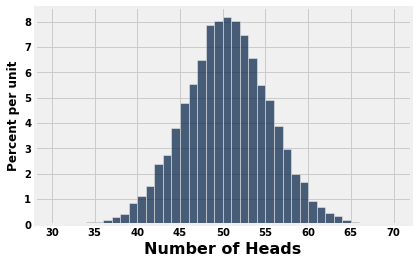

In [73]:
#: visualize distribution of trial results
Table().with_columns(
    'Number of Heads', head_counts
).hist(bins=np.arange(30, 71))

# Simulating Monty Hall

## Simulation strategy

1. Figure out how to simulate one game of Monty Hall.
2. Play a bunch of games.
3. Count the proportion of wins for each strategy (stay or switch).

## Simulating a single game

- We will make a function, `monty_hall()`, which simulates one play.
- Returns a 3-element array describing situation after host reveals first door, before choosing to "stay" or "switch":

```
[
    <prize behind original door>,
    <prize revealed by Monty>,
    <prize behind other door>
]
```

- If the prize behind the original door is the car, staying wins.
- If the prize behind the other door is the car, switching wins.

## Randomly pick an original door

- Randomly assign a prize to the original choice of door.
- You don't know what it is, yet, but Monty does.

In [74]:
#: randomly assign original_door_prize to a prize
prizes = ['Goat 1', 'Goat 2', 'Car']
original_door_prize = np.random.choice(prizes)

## What does Monty reveal?

- If your original door contains the car, Monty reveals a goat at random.
- If your original door contains a goat, Monty reveals the other goat.

In [79]:
def other_one(arr, which_is_not):
    if which_is_not == arr.item(0):
        return arr.item(1)
    elif which_is_not == arr.item(1):
        return arr.item(0)
    else:
        print('Invalid input!')

starry_night = make_array('star', 'moon')
other_one(starry_night, which_is_not='star')

'moon'

## What does Monty reveal?

- If your original door contains the car, Monty reveals a goat at random.
- If your original door contains a goat, Monty reveals the other goat.

In [80]:
goats = make_array('Goat 1', 'Goat 2')

if original_door_prize == 'Car':
    revealed = np.random.choice(['Goat 1', 'Goat 2'])
    other_door_prize = other_one(goats, which_is_not=revealed)
else: # it is a goat
    revealed = other_one(goats, which_is_not=original_door_prize)
    other_door_prize = 'Car'

## Putting it together...

In [81]:
def monty_hall():
    # randomly assign original_door_prize to a prize
    prizes = ['Goat 1', 'Goat 2', 'Car']
    original_door_prize = np.random.choice(prizes)
    
    goats = make_array('Goat 1', 'Goat 2')

    if original_door_prize == 'Car':
        revealed = np.random.choice(['Goat 1', 'Goat 2'])
        other_door_prize = other_one(goats, which_is_not=revealed)
    else: # it is a goat
        revealed = other_one(goats, which_is_not=original_door_prize)
        other_door_prize = 'Car'

    return make_array(original_door_prize, revealed, other_door_prize)

In [84]:
monty_hall()

array(['Goat 2', 'Goat 1', 'Car'], dtype='<U6')

## Play a bunch of times

In [85]:
#: many simulations
n_repetitions = 100

behind_original = make_array()
behind_revealed = make_array()
behind_other = make_array()

for i in np.arange(n_repetitions):
    result = monty_hall()
    behind_original = np.append(behind_original, result.item(0))
    behind_revealed = np.append(behind_revealed, result.item(1))
    behind_other = np.append(behind_other, result.item(2))

## Counting successes...

In [86]:
#: make a table of results
simulations = Table().with_columns(
    'original', behind_original,
    'revealed', behind_revealed,
    'other', behind_other
)
simulations

original,revealed,other
Car,Goat 2,Goat 1
Goat 2,Goat 1,Car
Goat 1,Goat 2,Car
Goat 1,Goat 2,Car
Goat 2,Goat 1,Car
Goat 1,Goat 2,Car
Car,Goat 1,Goat 2
Goat 1,Goat 2,Car
Car,Goat 2,Goat 1
Car,Goat 1,Goat 2


In [87]:
simulations.group('original')

original,count
Car,39
Goat 1,30
Goat 2,31


In [88]:
simulations.group('other')

other,count
Car,61
Goat 1,23
Goat 2,16


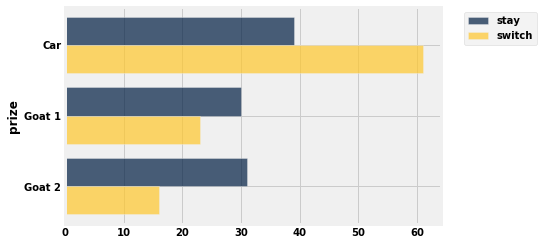

In [90]:
results = Table().with_columns(
    'prize', make_array('Car', 'Goat 1', 'Goat 2'),
    'stay', simulations.group('original').column('count'),
    'switch', simulations.group('other').column('count')
)
results.barh('prize')

## A simpler simulation...

- A function `simpler_monty_hall()`.
- Returns "switch" if switching was the winning strategy.
- Returns "stay" if staying was the winning strategy.

## Case-by-case

In [91]:
#: a simpler simulation of a single game

def simpler_monty_hall():
    original_prize = np.random.choice(['Car', 'Goat 1', 'Goat 2'])
    
    if original_prize == 'Car':
        # We want to stay!
        return 'stay'
    else:
        # The original prize is a goat.
        # Monty will reveal the other goat.
        # Switching wins!
        return 'switch'

## Play a bunch of times

In [112]:
#: many simulations

n_repetitions = 10000

winning_strategies = make_array()
for i in np.arange(n_repetitions):
    winning_strategy = simpler_monty_hall()
    winning_strategies = np.append(winning_strategies, winning_strategy)
    
np.count_nonzero(winning_strategies == 'switch') / n_repetitions

0.6655

# Probability

## Probability Theory

- So far, we have approximated some probabilities via simulation.
- But we can calculate them directly using *math*.

## Terminology

- **Outcome**: The result of an experiment.
    - e.g., the possible outcomes of rolling a 6-sided die are 1, 2, 3, 4, 5, 6
    - e.g., the possible outcomes of flipping a coin twice are HH, HT, TH, TT
- **Event**: A set of outcomes.
    - e.g., the event that the die lands on a even number is the collection of outcomes {2, 4, 6}.
    - e.g., the event that there was at least one head in two flips: {HH, HT, TH}
- **Probability**: A number between 0 and 1 which describes likelihood of event.
    - 1 if that event always happens
    - 0 if that event never happens
    - Notation: if $X$ is an event, $P(X)$ is the probability of the event.